## Predictive model

We are in the process of developing and evaluating multiple prediction models to forecast the win percentage of each team for the ongoing season (2023-2024). In our pursuit of identifying the most effective predictive model, we have conducted training and testing procedures on two distinct datasets. The first dataset is comprised solely of variables associated with 3-point statistics, while the second dataset encompasses all the variables we gathered and utilized in our prior analyses. This comprehensive approach is grounded in the understanding that attempting to predict win percentages solely based on 3-point variables might lack meaningful relevance.


We started importing usefull libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# you need to install the following libraries if you don't already have them installed: 
# pip install xgboost
# pip install prettytable

In [2]:
df = pd.read_csv('nba_stats_clean.csv')

In [3]:
#we consider all players in our dataset, without conidering the differences in the positions
df_All = df[df['Position'] == 'All']

In [4]:
X_all =df_All.drop(['WIN%', 'TEAM', 'Position'], axis=1)  
#It includes all variables except 'W' as input, and the two non-numeric variables.
X_3pt = df_All[['Anno','3PM', '3PA', '3P%']]  
# It contains only the variables related to three-point shots as input.
y = df_All['WIN%'] 
# It contains only the response variable that we aim to predict

Let's split our dataframes into training and test sets to train and evaluate our predictive models. We'll do this for both the complete dataframe and the one that includes only variables related to three-point shots.


In [5]:
X_all_train, X_all_test, y_train, y_test = train_test_split(X_all, y, test_size=0.2, random_state=42)
X_3pt_train, X_3pt_test, y_train, y_test = train_test_split(X_3pt, y, test_size=0.2, random_state=42)

Let's proceed with calculating various regression algorithms, first on the complete dataframe and then on the one containing only the three-point variables.

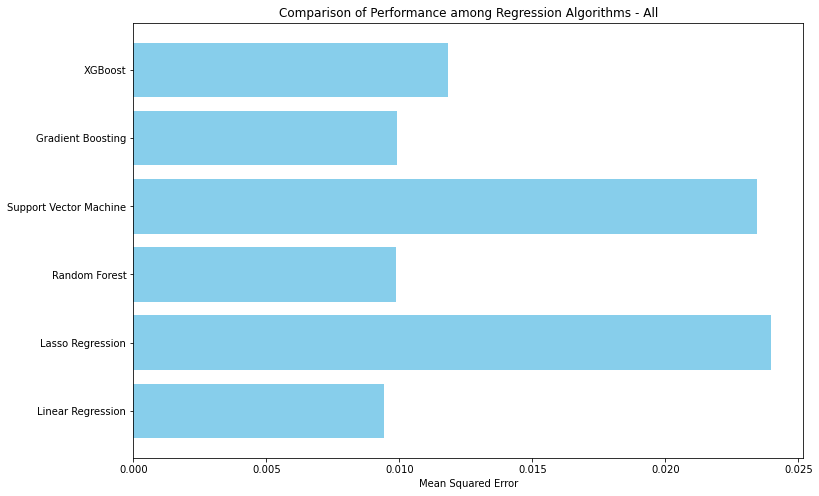

In [6]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Lasso
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# let's create a dictionary containing the differents algorithms
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Support Vector Machine': SVR(),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# let's train and test each model
mse_scores = {}

for model_name, model in models.items():
    model.fit(X_all_train, y_train)
    y_pred = model.predict(X_all_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores[model_name] = mse

# plot the results
plt.figure(figsize=(12, 8))
plt.barh(list(mse_scores.keys()), list(mse_scores.values()), color='skyblue')
plt.xlabel('Mean Squared Error')
plt.title('Comparison of Performance among Regression Algorithms - All')
plt.show()

In [7]:
from prettytable import PrettyTable

# Create a table
table = PrettyTable()
table.field_names = ['Model', 'Mean Squared Error']

# Add data to the table with rounded MSE values
for model_name, mse in mse_scores.items():
    rounded_mse = round(mse, 3)
    table.add_row([model_name, rounded_mse])

# Print the table
print(table)



+------------------------+--------------------+
|         Model          | Mean Squared Error |
+------------------------+--------------------+
|   Linear Regression    |       0.009        |
|    Lasso Regression    |       0.024        |
|     Random Forest      |        0.01        |
| Support Vector Machine |       0.023        |
|   Gradient Boosting    |        0.01        |
|        XGBoost         |       0.012        |
+------------------------+--------------------+


In [8]:
# Print the table manually with rounded MSE values
print("{:<25} {:<25}".format('Model', 'Mean Squared Error'))
print("-" * 50)

for model_name, mse in mse_scores.items():
    rounded_mse = round(mse, 3)
    print("{:<25} {:<25}".format(model_name, rounded_mse))


Model                     Mean Squared Error       
--------------------------------------------------
Linear Regression         0.009                    
Lasso Regression          0.024                    
Random Forest             0.01                     
Support Vector Machine    0.023                    
Gradient Boosting         0.01                     
XGBoost                   0.012                    


We observe the output, featuring a histogram illustrating the performance of the tested algorithms, accompanied by two tables detailing the specific Mean Squared Error (MSE) values for each algorithm.

now we consider the df containing just the variables about the 3 points (X_3pt)

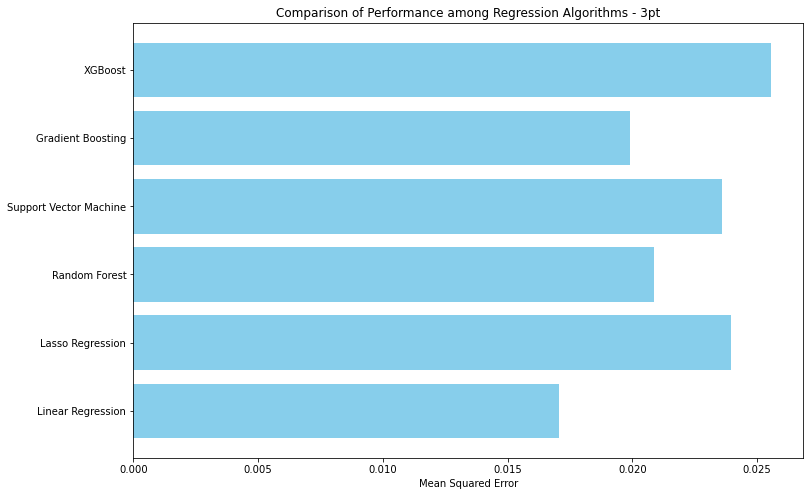

In [9]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Lasso
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# let's create a dictionary containing the differents algorithms
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Support Vector Machine': SVR(),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# let's train and test each model
mse_scores = {}

for model_name, model in models.items():
    model.fit(X_3pt_train, y_train)
    y_pred = model.predict(X_3pt_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores[model_name] = mse

# plot the results
plt.figure(figsize=(12, 8))
plt.barh(list(mse_scores.keys()), list(mse_scores.values()), color='skyblue')
plt.xlabel('Mean Squared Error')
plt.title('Comparison of Performance among Regression Algorithms - 3pt')
plt.show()

In [10]:
from prettytable import PrettyTable

# Create a table
table = PrettyTable()
table.field_names = ['Model', 'Mean Squared Error']

# Add data to the table with rounded MSE values
for model_name, mse in mse_scores.items():
    rounded_mse = round(mse, 3)
    table.add_row([model_name, rounded_mse])

# Print the table
print(table)

+------------------------+--------------------+
|         Model          | Mean Squared Error |
+------------------------+--------------------+
|   Linear Regression    |       0.017        |
|    Lasso Regression    |       0.024        |
|     Random Forest      |       0.021        |
| Support Vector Machine |       0.024        |
|   Gradient Boosting    |        0.02        |
|        XGBoost         |       0.026        |
+------------------------+--------------------+


In [11]:
# Print the table manually with rounded MSE values
print("{:<25} {:<25}".format('Model', 'Mean Squared Error'))
print("-" * 50)

for model_name, mse in mse_scores.items():
    rounded_mse = round(mse, 3)
    print("{:<25} {:<25}".format(model_name, rounded_mse))


Model                     Mean Squared Error       
--------------------------------------------------
Linear Regression         0.017                    
Lasso Regression          0.024                    
Random Forest             0.021                    
Support Vector Machine    0.024                    
Gradient Boosting         0.02                     
XGBoost                   0.026                    


As evident from the MSE results tables, linear regression outperforms other algorithms in both cases. Consequently, we have opted to utilize it for predicting the Win percentage for the 2024 season.

## 2024 Predictions

We aim to predict the win percentage values for each team using both linear regression tested on the entire dataset and linear regression applied exclusively to the dataset filtered for three-point variables. To predict values for the year 2024, we utilized data extracted from the NBA stats website through scraping, encompassing information up until November 3rd. These values were then applied to the predictive model to obtain win percentage estimates. Assuming that the values remain constant from November 3rd until the end of the season, we can predict the final standings.

In [12]:
df_23_24 = pd.read_csv('nba_stats_clean_2024.csv') 
#this is the dataset containg the values obtained throught scraping from the website nba.stats
#for the current year until the 3 of november, so we will use the values of the variables until that date for predict 
#the win percentage at the end of the regular season 
df_23_24 = df_23_24[df_23_24['Position'] == 'All']
#we consider only the values for all positions as we have done during the training the algorithm

In [13]:
#preparing the new dataframe that we have to use for predicting
x_All_2024 = df_23_24.drop(['WIN%', 'TEAM', 'Position', 'id'], axis=1)
x_3pt_2024 = df_23_24[['Anno','3PM', '3PA', '3P%']]

In [14]:
#We employ linear regression to predict the values, utilizing the dataframe with all variables.
linear_model = LinearRegression()
linear_model.fit(X_all_train, y_train)
y_pred_2024_linear = linear_model.predict(x_All_2024)
#We follow the same procedure for the values in the dataframe containing only the three-point variables
linear_model3 = LinearRegression()
linear_model3.fit(X_3pt_train, y_train)
y_pred_2024_linear3 = linear_model3.predict(x_3pt_2024)


In [15]:
y_pred_2024_linear.round(3)

array([0.713, 0.775, 0.635, 0.515, 0.368, 0.632, 0.553, 0.685, 0.47 ,
       0.5  , 0.372, 0.533, 0.708, 0.518, 0.548, 0.336, 0.46 , 0.252,
       0.356, 0.148, 0.489, 0.071, 0.341, 0.392, 0.367, 0.373, 0.453,
       0.415, 0.376, 0.199])

In [16]:
y_pred_2024_linear3.round(3)

array([0.833, 0.907, 0.395, 0.487, 0.38 , 0.674, 0.417, 0.863, 0.194,
       0.517, 0.273, 0.543, 0.838, 0.246, 0.506, 0.543, 0.4  , 0.195,
       0.356, 0.39 , 0.579, 0.161, 0.652, 0.443, 0.608, 0.199, 0.553,
       0.248, 0.593, 0.277])

In [17]:
import pandas as pd

# Create a DataFrame with the results of linear regression for all variables.
results_all = pd.DataFrame({'Actual': y_test, 'Predicted': linear_model.predict(X_all_test)})

# Create a DataFrame with the results of linear regression for three-point variables
results_3pt = pd.DataFrame({'Actual': y_test, 'Predicted': linear_model3.predict(X_3pt_test)})

# You can now print or visualize the results
print("Results for all variables:")
print(results_all)

print("\nResults for three-point variables:")
print(results_3pt)


Results for all variables:
      Actual  Predicted
731    0.512   0.520726
1103   0.329   0.484820
617    0.476   0.500255
2050   0.537   0.537181
2064   0.329   0.580072
...      ...        ...
1441   0.707   0.685948
1344   0.333   0.293569
1695   0.476   0.576496
2977   0.744   0.697063
2043   0.634   0.663593

[161 rows x 2 columns]

Results for three-point variables:
      Actual  Predicted
731    0.512   0.555315
1103   0.329   0.595688
617    0.476   0.579111
2050   0.537   0.479905
2064   0.329   0.572068
...      ...        ...
1441   0.707   0.539897
1344   0.333   0.342780
1695   0.476   0.462631
2977   0.744   0.514325
2043   0.634   0.470471

[161 rows x 2 columns]


We are currently generating a dataframe containing the predicted values derived from our models and the corresponding variables for the year 2024, which were used in the prediction process.

In [18]:
y_pred_all_2024_rounded = pd.Series(y_pred_2024_linear.round(3), name='y_pred_all_2024')
y_pred_3pt_2024_rounded = pd.Series(y_pred_2024_linear3.round(3), name='y_pred_3pt_2024')

df_combined = pd.concat([y_pred_all_2024_rounded, y_pred_3pt_2024_rounded, df_23_24], axis=1)

print(df_combined)

    y_pred_all_2024  y_pred_3pt_2024  Anno Position  id  \
0             0.713            0.833  2024      All   1   
1             0.775            0.907  2024      All   1   
2             0.635            0.395  2024      All   3   
3             0.515            0.487  2024      All   3   
4             0.368            0.380  2024      All   3   
5             0.632            0.674  2024      All   6   
6             0.553            0.417  2024      All   7   
7             0.685            0.863  2024      All   7   
8             0.470            0.194  2024      All   7   
9             0.500            0.517  2024      All   7   
10            0.372            0.273  2024      All   7   
11            0.533            0.543  2024      All   7   
12            0.708            0.838  2024      All  13   
13            0.518            0.246  2024      All  13   
14            0.548            0.506  2024      All  13   
15            0.336            0.543  2024      All  13 

Now, we print the predicted NBA standings at the end of the season from our two models, including the associated win percentages.

In [19]:
# Creare un DataFrame contenente solo le colonne necessarie per le predizioni del 2024
df_pred_all_2024 = df_combined[['y_pred_all_2024', 'TEAM']].sort_values(by='y_pred_all_2024', ascending=False)

# Creare un DataFrame contenente solo le colonne necessarie per le predizioni dei 3 punti del 2024
df_pred_3pt_2024 = df_combined[['y_pred_3pt_2024', 'TEAM']].sort_values(by='y_pred_3pt_2024', ascending=False)

# Visualizzare i DataFrame risultanti
print("Predictions 2024:")
print(df_pred_all_2024)

print("\nPredictions 2024 - 3 points stats:")
print(df_pred_3pt_2024)


Predictions 2024:
    y_pred_all_2024                    TEAM
1             0.775        Dallas Mavericks
0             0.713          Boston Celtics
12            0.708           Brooklyn Nets
7             0.685             LA Clippers
2             0.635          Denver Nuggets
5             0.632      Philadelphia 76ers
6             0.553           Atlanta Hawks
14            0.548         Milwaukee Bucks
11            0.533       San Antonio Spurs
13            0.518          Indiana Pacers
3             0.515   Golden State Warriors
9             0.500   Oklahoma City Thunder
20            0.489            Phoenix Suns
8             0.470      Los Angeles Lakers
16            0.460        Sacramento Kings
26            0.453         Houston Rockets
27            0.415      Washington Wizards
23            0.392         Toronto Raptors
28            0.376              Miami Heat
25            0.373       Charlotte Hornets
10            0.372           Orlando Magic
4             

The results differ between the two models, as expected, and are intriguing. However, it's important to note that these predictions are significantly distorted since they are based on statistics derived from only the first 5-6 games of the regular season.